In [1]:
import os, shutil, pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt

In [2]:
# 1.1. Hacer un submuestreo de los datos en la siguiente estructura
BASE = pathlib.Path("../").resolve() #pathlib.Path(__file__).parent.resolve()
dir_origen = BASE / "dogs-vs-cats" / "train"
dir_base = BASE / "data" / "dogs-vs-cats"
dir_models = BASE / "models"


In [4]:
# 1.2.- Definir funcion para seleccionar y transferir archivos de muestra
def transferir_muestra(nombre_muestra, indice_inicio, indice_fin):
    for categoria in ("cat", "dog"):
        directorio_actual = dir_base / nombre_muestra / categoria
        os.makedirs(directorio_actual, exist_ok=True)
        nombre_archivos = [f"{categoria}.{i}.jpg" for i in range(indice_inicio, indice_fin)]
        for archivo in nombre_archivos:
            shutil.copyfile(src=dir_origen / archivo, dst=directorio_actual / archivo)


In [5]:
# 1.3- Transferir las muestras
transferir_muestra("train", 0, 1000)
transferir_muestra("validation", 1000, 1500)
transferir_muestra("test", 1500, 2500)


In [6]:
# 1.4- Definir función para graficar resultados
def graficar_resultados(history):
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(accuracy) + 1)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Subplot 1: Accuracy
    axes[0].plot(epochs, accuracy, "bo", label="Training accuracy")
    axes[0].plot(epochs, val_accuracy, "b", label="Validation accuracy")
    axes[0].set_title("Training and validation accuracy")
    axes[0].legend()
    axes[0].set_xlabel("Epochs")
    axes[0].set_ylabel("Accuracy")

    # Subplot 2: Loss
    axes[1].plot(epochs, loss, "bo", label="Training loss")
    axes[1].plot(epochs, val_loss, "b", label="Validation loss")
    axes[1].set_title("Training and validation loss")
    axes[1].legend()
    axes[1].set_xlabel("Epochs")
    axes[1].set_ylabel("Loss")

    plt.tight_layout()
    plt.show()

In [7]:
# 1.5- Definir función para evaluar el modelo
def evaluar_modelo(model, test_dataset):
    RNA_CNN = keras.models.load_model(dir_models / model)
    test_loss, test_acc = RNA_CNN.evaluate(test_dataset)
    print(f"Accuracy en Test: {test_acc:.3f} - Loss: {test_loss:.3f}")
    #return test_loss, test_acc

In [8]:
# 2.- Arquitectura de la Red, por capas:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1. / 255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
RNA_CNN_1 = keras.Model(inputs=inputs, outputs=outputs)
RNA_CNN_1.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        20,737 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,153 (1.56 MB)

 Trainable params: 409,153 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
RNA_CNN_1.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [10]:
# 4.- Cargar los datos de entrenamiento, validación y prueba
train_dataset = image_dataset_from_directory(
    dir_base / "train",
    image_size=(180, 180),
    batch_size=32
)

validation_dataset = image_dataset_from_directory(
    dir_base / "validation",
    image_size=(180, 180),
    batch_size=32
)

test_dataset = image_dataset_from_directory(
    dir_base / "test",
    image_size=(180, 180),
    batch_size=32
)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [11]:
# 5.- Dimensiones de los datos
for data_batch, label_batch in train_dataset:
    print("shape del batch de datos:", data_batch.shape)
    print("shape del batch de etiquetas:", label_batch.shape)
    break


shape del batch de datos: (32, 180, 180, 3)
shape del batch de etiquetas: (32,)


In [12]:
# 6.- Definir callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=dir_models / "RNA_CNN_1.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]


In [13]:
# 7.- Entrenamiento del modelo
history_1 = RNA_CNN_1.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 59s 930ms/step - accuracy: 0.5185 - loss: 0.7119 - val_accuracy: 0.6060 - val_loss: 0.6889
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 263ms/step - accuracy: 0.5560 - loss: 0.6933 - val_accuracy: 0.6380 - val_loss: 0.6617
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 269ms/step - accuracy: 0.6285 - loss: 0.6572 - val_accuracy: 0.6600 - val_loss: 0.6301
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.6815 - loss: 0.6033 - val_accuracy: 0.5960 - val_loss: 0.7937
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 173s 3s/step - accuracy: 0.6970 - loss: 0.6009 - val_accuracy: 0.5830 - val_loss: 0.9302
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.7375 - loss: 0.5448 - val_accuracy: 0.7030 - val_loss: 0.5771
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.7575 - loss: 0.4963 - val_accuracy: 0.6890 - val_loss: 0.6050
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 199s 3s/step - accuracy: 0.7825 - loss: 0.4639 - val_accuracy: 0.649

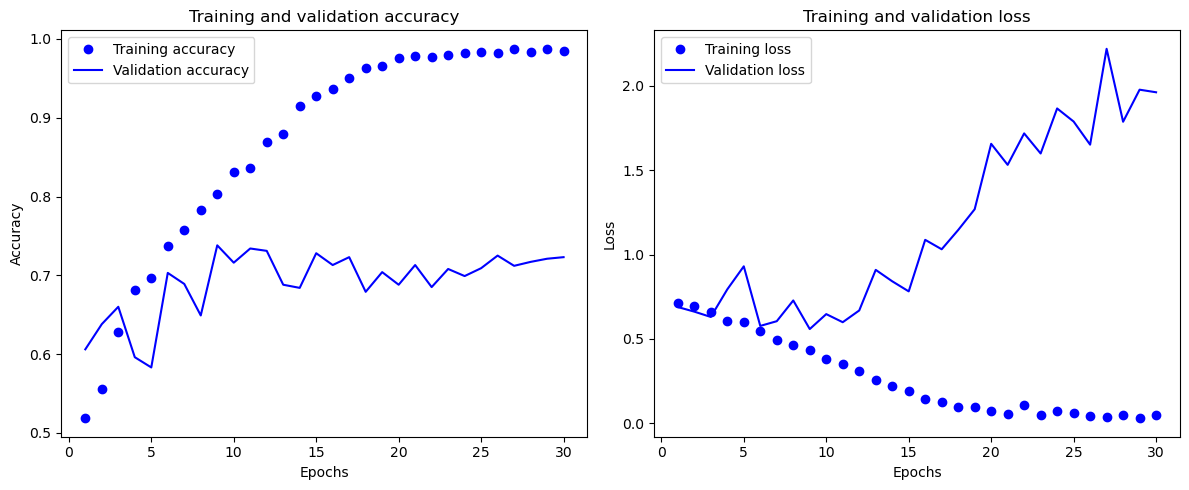

In [14]:
# 8.-
graficar_resultados(history_1)
# accuracy = history.history["accuracy"]
# val_accuracy = history.history["val_accuracy"]
# loss = history.history["loss"]
# val_loss = history.history["val_loss"]
# epochs = range(1, len(accuracy) + 1)

# plt.plot(epochs, accuracy, "bo", label="Training accuracy")
# plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
# plt.title("Training and validation accuracy")
# plt.legend()

# plt.figure()
# plt.plot(epochs, loss, "bo", label="Training loss")
# plt.plot(epochs, val_loss, "b", label="Validation loss")
# plt.title("Training and validation loss")
# plt.legend()

# plt.show()


In [15]:
# 9.-
evaluar_modelo("RNA_CNN_1.keras", test_dataset)
# RNA_CNN_1_OK = keras.models.load_model("../models/RNA_CNN_1.keras")
# test_loss, test_acc = RNA_CNN_1_OK.evaluate(test_dataset)
# print(f"Accuracy en Test: {test_acc:.3f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.7375 - loss: 0.5440
Accuracy en Test: 0.738 - Loss: 0.544


In [16]:
# 10.- Definir data augmentation
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


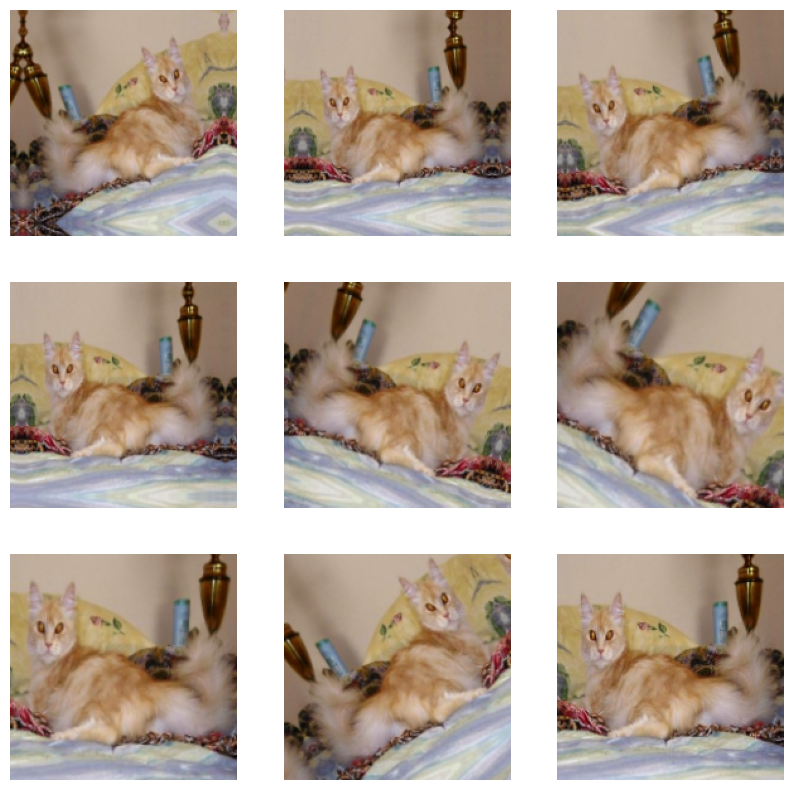

In [17]:
# 11.- Visualizar data augmentation
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(2):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")


In [18]:
# 12.- Arquitectura de la Red usando data_augmentation
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1. / 255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
RNA_CNN_2 = keras.Model(inputs=inputs, outputs=outputs)

RNA_CNN_2.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=dir_models / "RNA_CNN_2.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]


In [19]:
# 13.- Entrenando la Red con data_augmentation
history_2 = RNA_CNN_2.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 451ms/step - accuracy: 0.4970 - loss: 0.7002 - val_accuracy: 0.5790 - val_loss: 0.6924
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 512ms/step - accuracy: 0.5445 - loss: 0.6918 - val_accuracy: 0.5630 - val_loss: 0.6753
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 509ms/step - accuracy: 0.5950 - loss: 0.6909 - val_accuracy: 0.6060 - val_loss: 0.6551
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 511ms/step - accuracy: 0.6385 - loss: 0.6427 - val_accuracy: 0.6460 - val_loss: 0.6191
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 654ms/step - accuracy: 0.6570 - loss: 0.6443 - val_accuracy: 0.6630 - val_loss: 0.6120
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 487ms/step - accuracy: 0.6885 - loss: 0.6057 - val_accuracy: 0.6350 - val_loss: 0.6181
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 477ms/step - accuracy: 0.6795 - loss: 0.6081 - val_accuracy: 0.6810 - val_loss: 0.5919
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 474ms/step - accuracy: 0.6980 - loss: 0.5874 - val_accu

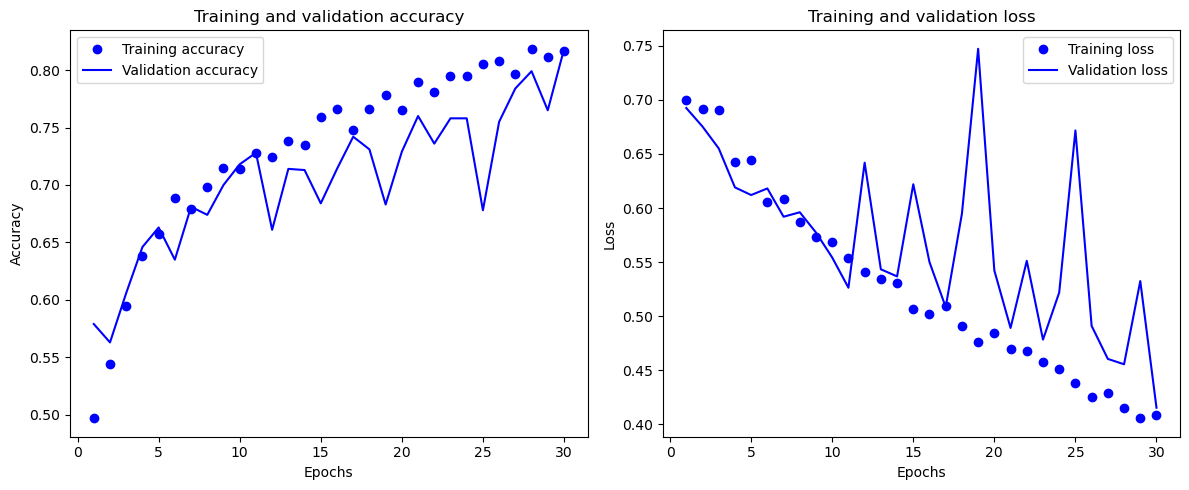

In [20]:
# 13.1- Graficando resultados
graficar_resultados(history_2)

In [21]:
# 13.2- Evaluando el modelo
evaluar_modelo("RNA_CNN_2.keras", test_dataset)

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.7875 - loss: 0.4587
Accuracy en Test: 0.788 - Loss: 0.459


In [22]:
# 14.- Arquitectura de la Red usando data_augmentation y drop_out
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1. / 255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
RNA_CNN_3 = keras.Model(inputs=inputs, outputs=outputs)

RNA_CNN_3.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=dir_models / "RNA_CNN_3.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]


In [23]:
# 15.- Entrenando la Red con data_augmentation y dropout
history_3 = RNA_CNN_3.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 437ms/step - accuracy: 0.4995 - loss: 0.7223 - val_accuracy: 0.5000 - val_loss: 0.6940
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 501ms/step - accuracy: 0.5340 - loss: 0.6940 - val_accuracy: 0.5230 - val_loss: 0.6887
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 523ms/step - accuracy: 0.5605 - loss: 0.6860 - val_accuracy: 0.6440 - val_loss: 0.6665
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 501ms/step - accuracy: 0.6135 - loss: 0.6666 - val_accuracy: 0.6250 - val_loss: 0.6416
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 482ms/step - accuracy: 0.6340 - loss: 0.6433 - val_accuracy: 0.6360 - val_loss: 0.6466
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 467ms/step - accuracy: 0.6690 - loss: 0.6236 - val_accuracy: 0.5290 - val_loss: 1.1302
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 469ms/step - accuracy: 0.6815 - loss: 0.6108 - val_accuracy: 0.6020 - val_loss: 0.7171
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 497ms/step - accuracy: 0.6755 - loss: 0.5977 - val_accu

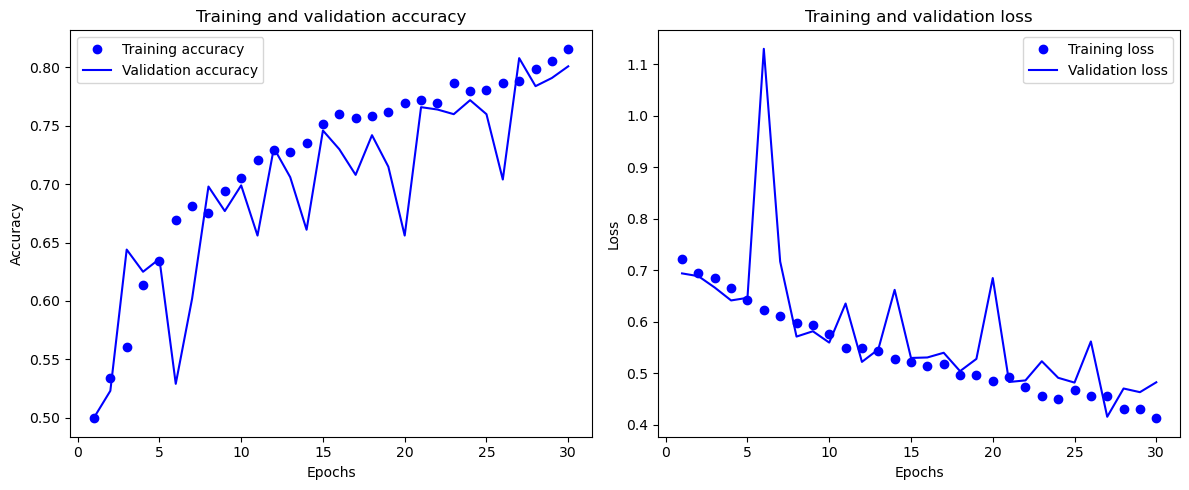

In [24]:
# 15.1- Graficando resultados
graficar_resultados(history_3)

In [25]:
# 15.2- Evaluando el modelo
evaluar_modelo("RNA_CNN_3.keras", test_dataset)

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.7885 - loss: 0.4489
Accuracy en Test: 0.789 - Loss: 0.449
